# Контрольная работа 1
## Сальков Юрий Алексеевич ПИН-31

### 1.
Вычислить приближенно, используя дифференциал 1-го порядка: 5,02 - 27,03. Сравнить со значением, найденным при помощи калькулятора.
### 2.
Найти экстремумы функции и = ху(x + у - 1)
### 3. 
Исследовать функцию = + на условный экстремум при -+и при условии неотрицательности аргументов

In [3]:
import sympy

def approximate_function(f, x0, h):
    x = sympy.symbols('x')
    f_expr = sympy.sympify(f)
    f_prime = f_expr.diff(x)
    return f_expr.subs(x, x0) + f_prime.subs(x, x0)*(h)

f = "5.02*((27.03)**(1/3))"
approximation = approximate_function(f, 27, 0.03)
print(approximation)

15.0655757132084


[(0, 0), (0, 1), (1/3, 1/3), (1, 0)]


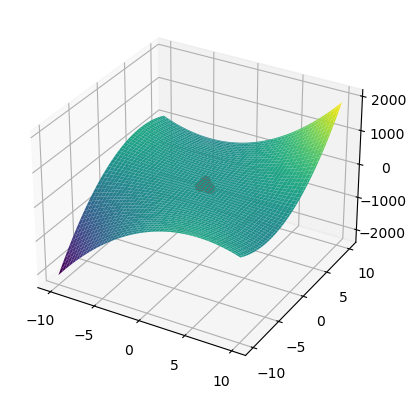

In [11]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function(f, x_range, y_range):
    x, y = sympy.symbols('x y')
    f_expr = sympy.sympify(f)
    f_lambdified = sympy.lambdify((x, y), f_expr, 'numpy')
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    y_vals = np.linspace(y_range[0], y_range[1], 100)
    x_vals = np.linspace(x_range[0], x_range[1], 100)
    
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f_lambdified(X, Y)
    
    ax.plot_surface(X, Y, Z, cmap='viridis')
    
    extrema = sympy.solve((f_expr.diff(x), f_expr.diff(y)), (x, y))
    sympy.pprint(extrema)
    
    for extremum in extrema:
        x_val, y_val = extremum
        z_val = f_lambdified(x_val, y_val)
        ax.scatter(x_val, y_val, z_val, color='red', s=50)
    
    plt.show()

f = 'x*y*(x+y-1)'
plot_function(f, (-10, 10), (-10, 10))

[]


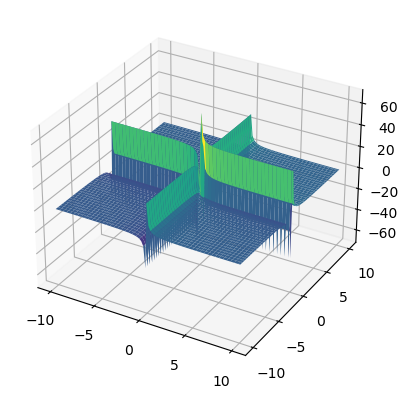

[(-3.33333333333333, -2.5, 5.0), (3.33333333333333, 2.5, -5.0)]


TypeError: Field elements must be 2- or 3-tuples, got '-0.162000000000000'

In [25]:
import sympy as sp
import numpy as np

# Создание символьных переменных
x, y, l = sp.symbols('x y l')

# Определение функции
f = 3/x + 4/y

plot_function(f,(-10, 10), (-10, 10))

# Определение ограничения
g = 1/(x**2) + 1/(y**2) - 1/4

L = f + l*g

# Решение системы уравнений для стационарных точек
stationary_points = sp.solve([sp.diff(L, x), sp.diff(L, y), g], [x, y, l], domain=sp.S.Reals)
sp.pprint(stationary_points)

# Создание матрицы Гессе для проверки на экстремум
H = np.array([[sp.diff(f, x, x), sp.diff(f, x, y)], [sp.diff(f, x, y), sp.diff(f, y, y)]])

# Проверка каждой стационарной точки на экстремум
for point in stationary_points:
    x_val = point[0]
    y_val = point[1]
    if g.subs([(x, x_val), (y, y_val)]) >= 0 and H[0, 0].subs([(x, x_val), (y, y_val)]) > 0 and np.linalg.det(np.array( [ H[1, 1].subs([(x, x_val), (y, y_val)]) ], [ H[0, 0].subs([(x, x_val), (y, y_val)]) ])) > 0:
        print(f'Точка ({x_val}, {y_val}) - это точка минимума')
    elif g.subs([(x, x_val), (y, y_val)]) >= 0 and H[0, 0].subs([(x, x_val), (y, y_val)]) < 0 and np.linalg.det(np.array( [ H[1, 1].subs([(x, x_val), (y, y_val)]) ], [ H[0, 0].subs([(x, x_val), (y, y_val)]) ]))  > 0:
        print(f'Точка ({x_val}, {y_val}) - это точка максимума')
    else:
        print(f'Точка ({x_val}, {y_val}) - это точка седловой точки')

# Проверка функции на условный экстремум
for point in stationary_points:
    x_val = point[0]
    y_val = point[1]
    if g.subs([(x, x_val), (y, y_val)]) >= 0:
        z_val = f.subs([(x, x_val), (y, y_val)])
        print(f'Функция имеет значение {z_val} в точке ({x_val}, {y_val})')